In [919]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from plotly.offline import iplot
import plotly.graph_objects as go



# Importation de deux bases 

In [913]:
dataset = pd.read_csv("/Users/tavaresmaura//Desktop/SVM et ANN python /house-prices-advanced-regression-techniques/train.csv", sep=',')

In [914]:
datatest = pd.read_csv("/Users/tavaresmaura//Desktop/SVM et ANN python /house-prices-advanced-regression-techniques/test.csv", sep=',')

In [915]:
#### visualization des 5 prémières lignes
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [916]:
#### visualization des 5 prémières lignes
datatest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [791]:
dataset.shape #####nombre de lignes et observations

(1460, 81)

In [792]:
datatest.shape #####nombre de lignes et observations

(1459, 80)

In [793]:
dataset.describe()
#stat descriptives de la base train

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [794]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [796]:
#stat descriptive de la variable à prédire
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [797]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [798]:
###sauvegarde de ID avant de l'effacer
train_Id = dataset ['Id']
test_Id =pd.DataFrame (datatest['Id'])

In [799]:
#on efface Id car elle n'est pas utile pour prédiction
dataset.drop(['Id'], axis=1, inplace=True)


In [800]:
#on efface Id car elle n'est pas utile pour prédiction
datatest.drop(['Id'], axis=1, inplace=True)

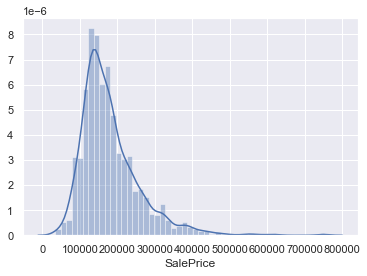

In [801]:
#histogramme

sns.distplot(dataset['SalePrice']);

# corrélation entre salesprice et les variables numériques

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


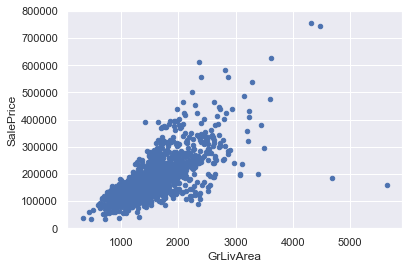

In [802]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


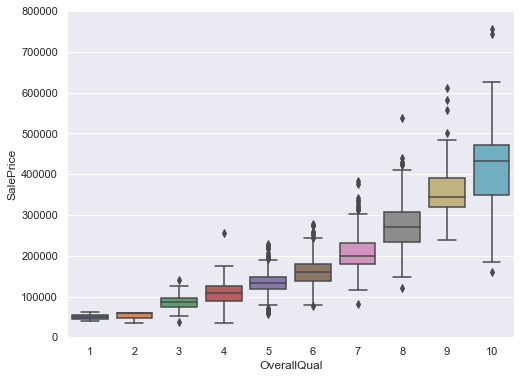

In [803]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

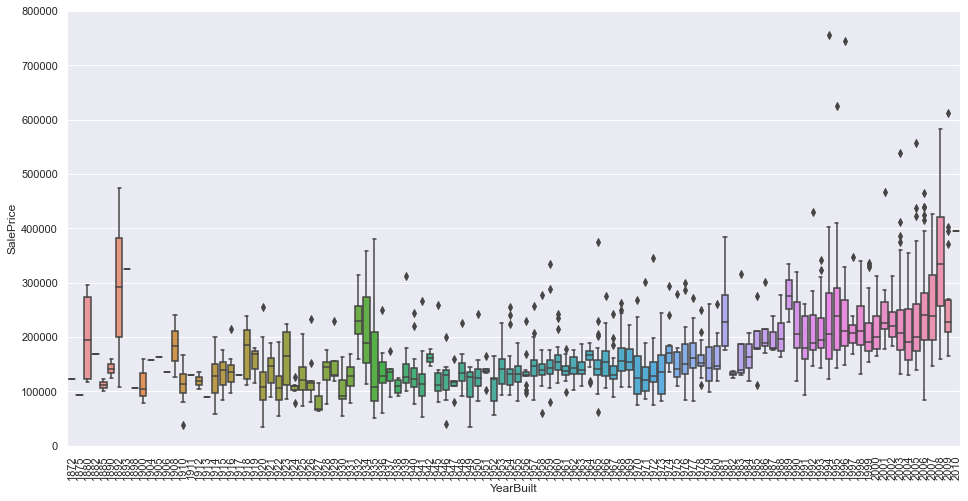

In [804]:
#yearBuilt et salesprice
var = 'YearBuilt'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


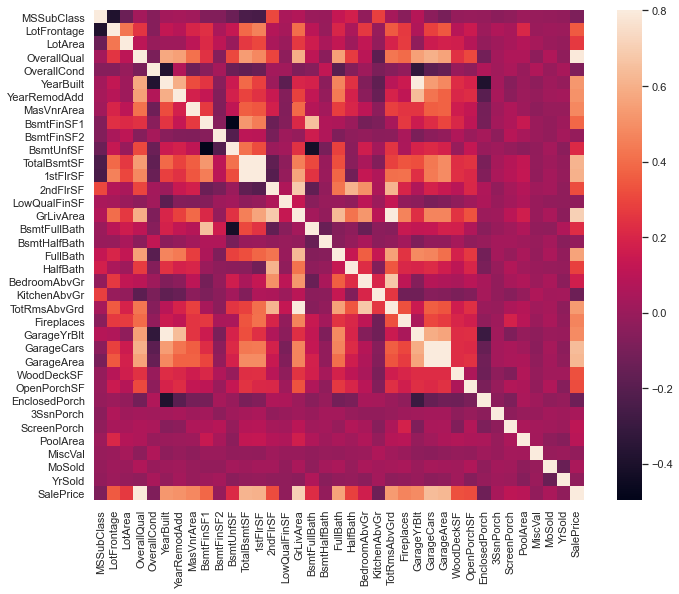

In [805]:
#matrice de corrélation
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [806]:
correlation_matrix = dataset.corr()
correlation_matrix['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

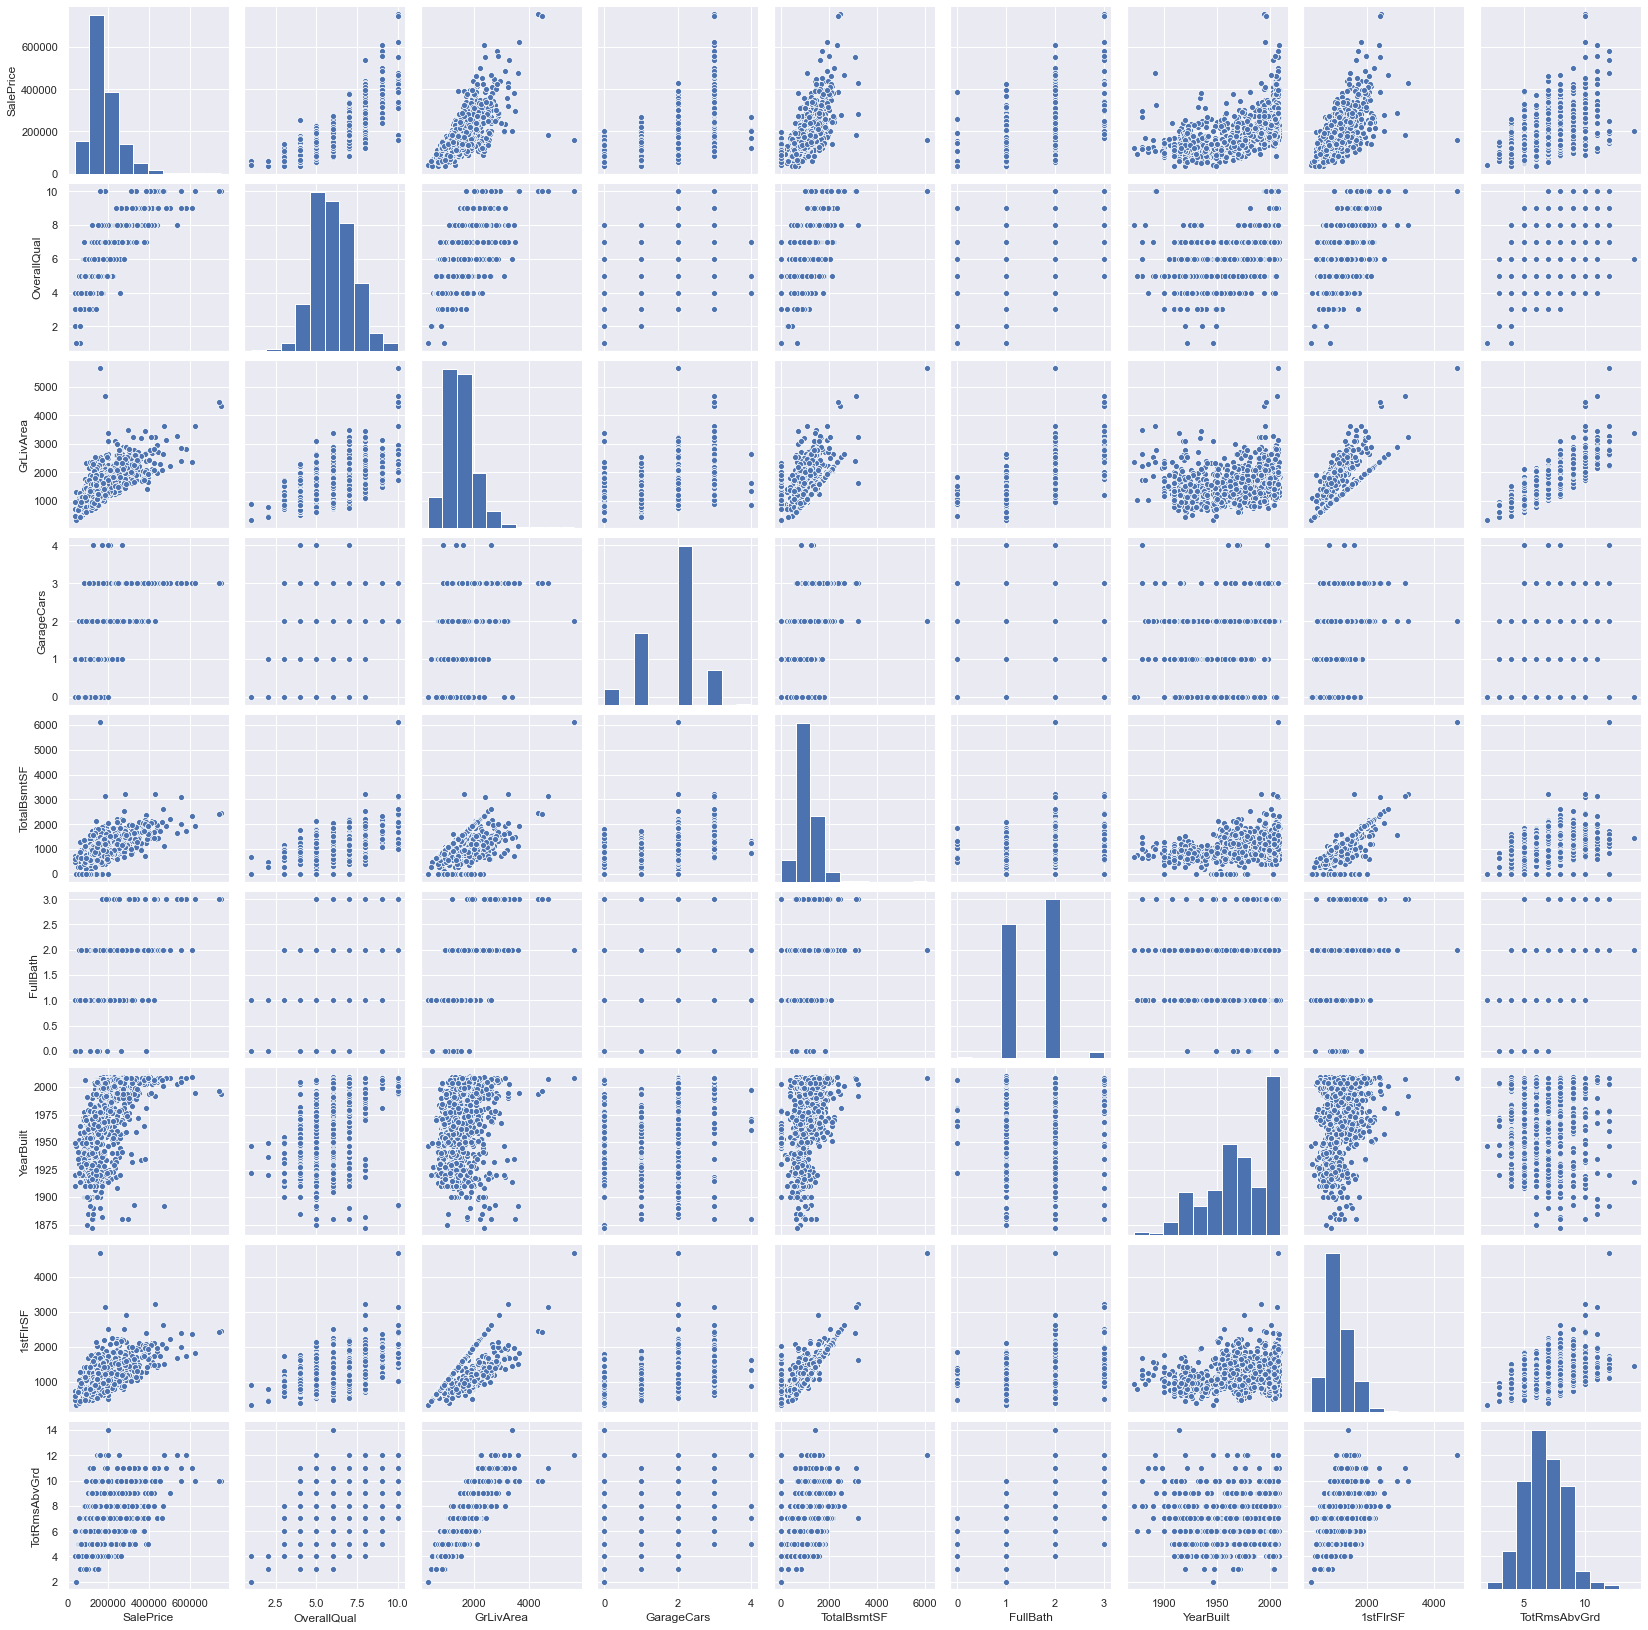

In [807]:
#graphiques
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','1stFlrSF','TotRmsAbvGrd']
sns.pairplot(dataset[cols], size = 2.5)
plt.show();

# outliers 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


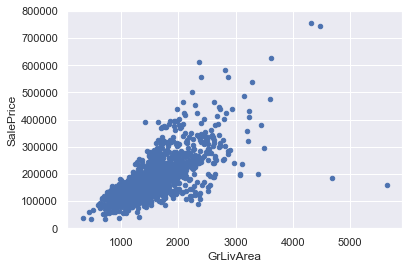

In [808]:
var = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

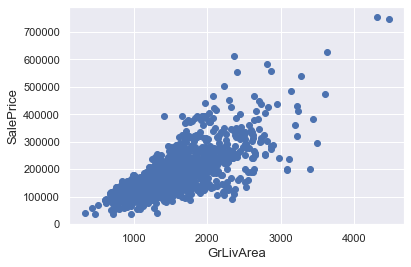

In [809]:
#Deleting outliers
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index)

#on refait le graphique
fig, ax = plt.subplots()
ax.scatter(dataset['GrLivArea'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


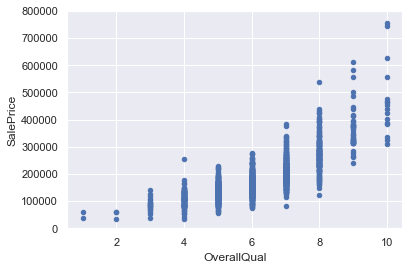

In [810]:
var = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# normalité de la variable Y

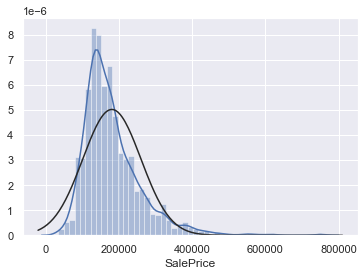

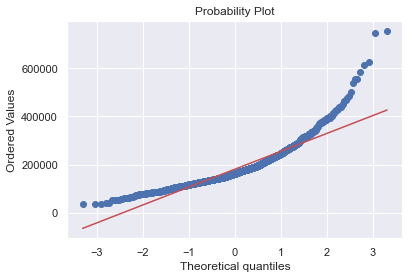

In [811]:

sns.distplot(dataset['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'], plot=plt)

###y ne suis pas la loi normale 

In [812]:
#skewness et kurtosis de Y
print('skewness : %f' % dataset['SalePrice'].skew()) 
print('kurtosis : %f' % dataset['SalePrice'].kurt()) 


skewness : 1.881296
kurtosis : 6.523067


In [813]:
dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

# concanement des deux bases

In [814]:

ntrain = dataset.shape[0]
ntest = datatest.shape[0]
all_data = pd.concat((dataset, datatest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


In [815]:
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [816]:
####valeurs manquantes 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
PoolQC            99.691464
MiscFeature       96.400411
Alley             93.212204
Fence             80.425094
FireplaceQu       48.680151
LotFrontage       16.660953
GarageFinish       5.450806
GarageYrBlt        5.450806
GarageQual         5.450806
GarageCond         5.450806
GarageType         5.382242
BsmtExposure       2.811107
BsmtCond           2.811107
BsmtQual           2.776826
BsmtFinType2       2.742544
BsmtFinType1       2.708262
MasVnrType         0.822763
MasVnrArea         0.788481
MSZoning           0.137127
BsmtFullBath       0.068564

Text(0.5, 1.0, 'Percent missing data by feature')

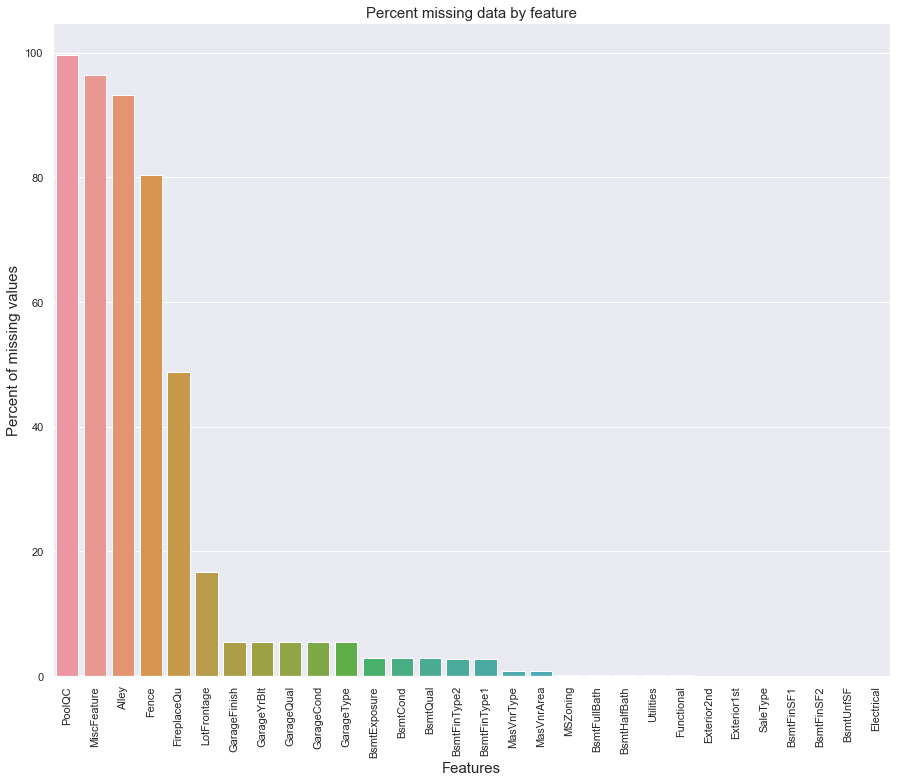

In [817]:
###graphique des variables en fonction des valeurs manquantes
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [818]:
###on supprimera les 5 premières variables et on imputera des valeurs pour les autres

In [819]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [820]:
all_data.shape

(2917, 74)

# imputation des valeurs

In [821]:
#Grouper par quartier et remplir la valeur manquante par la médiane LotFrontage de tous les voisins
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [822]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')


In [823]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [824]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)


In [825]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')


In [826]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


In [827]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])


In [828]:

all_data = all_data.drop(['Utilities'], axis=1)


In [829]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [830]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [831]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


In [832]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [833]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [834]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [835]:
#vérification qu'il n'y a plus des NA
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


Empty DataFrame
Columns: [Missing Ratio]
Index: []

# Transformation des quelques variables quant en quali

In [836]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [837]:
from sklearn.preprocessing import LabelEncoder
cols = ( 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, appliqquer LabelEncoder aux variables categoricales 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 73)


In [838]:
# ajout d'une nouvelle variable 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [839]:
num_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
LandSlope       4.973254
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101

In [840]:
####Dummies
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 211)


In [841]:
all_data.head()

MSSubClass  LotFrontage  LotArea  Street  LotShape  LandSlope  OverallQual  \
0          10         65.0     8450       1         3          0            7   
1           5         80.0     9600       1         3          0            6   
2          10         68.0    11250       1         0          0            7   
3          11         60.0     9550       1         0          0            7   
4          10         84.0    14260       1         0          0            8   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLw  SaleType_New  \
0            4       2003          2003  ...               0             0   
1            7       1976          1976  ...               0             0   
2            4       2001          2002  ...               0             0   
3            4       1915          1970  ...               0             0   
4            4       2000          2000  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 211 columns]

In [842]:
#####rédivision de la base

train = all_data[:ntrain]
test = all_data[ntrain:]

In [843]:
###étant donné que la base test ne possède pas de Y, on crée notre propre base test
from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(train, test_size=0.30, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1020, 211)
(438, 211)
(1020,)
(438,)


In [844]:
#échatillonage pour Y
Y_train, Y_test = train_test_split(dataset['SalePrice'], test_size=0.30, random_state=123)

print(Y_train.shape)
print(Y_test.shape)

(1020,)
(438,)


# Modélisation (lasso, ridge, randomforest,gradientboosting,svm et arbre de décision)

In [847]:
##mse et mae
from sklearn.metrics import mean_squared_error, mean_absolute_error



# lasso

In [867]:
 from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)
Y_pred = lasso_reg.predict(X_train)

lasso_r2 = r2_score(Y_train,Y_pred)
lasso_mse = mean_squared_error(Y_train,Y_pred)
lasso_rmse = np.sqrt(lasso_mse)

lasso_mae = mean_absolute_error(Y_train, Y_pred)

print('{:25s}{:5.3f}'.format('R2:', lasso_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', lasso_mae))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', lasso_mae))
print('{:25s}{:5f} to {:5f}'.format('Range of Sale Prices:', np.amin(Y_train), np.amax(Y_train)))
#pb de sur-apprentissage





R2:                      0.934
Root Mean Squared Error: 14608.667
Mean Absolute Error:     14608.667
Range of Sale Prices:    34900.000000 to 755000.000000


In [872]:
#####utilisation avec la base test
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_test, Y_test)
Y_pred = lasso_reg.predict(X_test)

lasso_r2 = r2_score(Y_test,Y_pred)
lasso_mse = mean_squared_error(Y_test,Y_pred)
lasso_rmse = np.sqrt(lasso_mse)

lasso_mae = mean_absolute_error(Y_test, Y_pred)

print('{:25s}{:5.3f}'.format('R2:', lasso_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', lasso_mae))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', lasso_mae))
print('{:25s}{:5f} to {:5f}'.format('Range of Sale Prices:', np.amin(Y_test), np.amax(Y_test)))
#pb de sur-apprentissage





R2:                      0.946
Root Mean Squared Error: 11465.582
Mean Absolute Error:     11465.582
Range of Sale Prices:    37900.000000 to 582933.000000


# ARBRE DE DECISION

In [868]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

Y_pred = tree_reg.predict(X_train)
tree_r2 = r2_score(Y_train, Y_pred)
tree_mse = mean_squared_error(Y_train,Y_pred)
tree_rmse = np.sqrt(tree_mse)

tree_mae = mean_absolute_error(Y_train, Y_pred)
print('{:25s}{:5.3f}'.format('R2:', tree_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', tree_mae))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', tree_mae))
#pb de sur-apprentissage

R2:                      1.000
Root Mean Squared Error: 0.000
Mean Absolute Error:     0.000


In [757]:
from sklearn.metrics import r2_score

print(" Train R2-score : {}".format(
    r2_score(Y_train, tree_reg.predict(X_train))
))
 
print("Valid R2-score : {}".format(
    r2_score(Y_test, tree_reg.predict(X_test) )
))

#pb de sur-apprentissage

 Train R2-score : 1.0
Valid R2-score : 0.7141333111154461


In [871]:
tree_reg = DecisionTreeRegressor(max_depth = 20,
                             min_samples_split = 0.3,
                             random_state=0)

tree_reg.fit(X_train, Y_train)
tree_r2 = r2_score(Y_train, Y_pred)
tree_mse = mean_squared_error(Y_train,Y_pred)
tree_rmse = np.sqrt(tree_mse)



print(" Train R2-score : {}".format(
    r2_score(Y_train, tree_reg.predict(X_train))
))
 
print("Valid R2-score : {}".format(
    r2_score(Y_test, tree_reg.predict(X_test) )
))

 Train R2-score : 0.6312150751896594
Valid R2-score : 0.6662253561248417


In [ ]:

Y_pred = tree_reg.predict(X_train)
tree_mae = mean_absolute_error(Y_train, Y_pred)
print('{:25s}{:5.3f}'.format('R2:', tree_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', tree_mae))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', tree_mae))
#pb de sur-apprentissage

# arbre de décision avec cross_validation

In [759]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, Y_train,
                        scoring="neg_mean_squared_error",cv=10 )
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores) #### arbre de décision moins performante que le modèle linéaire

Scores: [48300.78309315 43127.83041068 43893.84748151 58211.16034402
 69873.29558645 48448.24830244 63436.47798695 65777.75960368
 37245.14975341 44870.1272733 ]
Mean: 52318.46798355871
Standard deviation: 10568.366082015975


In [760]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, Y_train,
                        scoring="r2",cv=10 )
tree_rmse_scores = np.sqrt(-scores)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())
    
    

Scores: [0.66521431 0.62029489 0.69051766 0.53638898 0.5620156  0.49873155
 0.49530562 0.42290863 0.7643833  0.55251127]
Mean: 0.5808271801607706
Standard deviation: 0.09824767555316635


<ipython-input-760-b6413430ecdb>:4: RuntimeWarning:

invalid value encountered in sqrt



# modèle linéaire lasso avec Cross_validation

In [866]:
lasso_scores = cross_val_score(lasso_reg, X_train, Y_train,
                             scoring="neg_mean_squared_error", cv=10)

lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [32405.07612573 23666.10075878 25532.48624048 32474.83428556
 33167.47580222 29768.05352251 30025.97570198 28668.89490448
 25749.75360528 23749.01866038]
Mean: 28520.766960739576
Standard deviation: 3451.136488450148


# Forêt aléatoire

In [762]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)

Y_pred = forest_reg.predict(X_train)
forest_r2 = r2_score(Y_train,Y_pred)
forest_mse = mean_squared_error(Y_train, Y_pred)
forest_rmse = np.sqrt(forest_mse)

forest_mae = mean_absolute_error(Y_train, Y_pred)

print('{:25s}{:5.3f}'.format('R2:', forest_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', forest_mae))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', forest_mae))

scores = cross_val_score(forest_reg, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

R2:                      0.985
Root Mean Squared Error: 6373.371
Mean Absolute Error:     6373.371
Scores: [26418.51275315 25786.28492287 20959.36794099 31627.46813132
 28222.10985147 23484.58932602 35617.31500639 31520.72840223
 21509.5120368  19938.63726827]
Mean: 26508.452563950075
Standard deviation: 4958.354661291457


In [763]:
##forêt avec changement des paramètres
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 50,
                             max_depth = 7,
                             min_samples_split = 0.03,
                             random_state=0) 
clf.fit(X_train, Y_train)
forest_reg.fit(X_train, Y_train)

Y_pred = forest_reg.predict(X_train)
forest_r2 = r2_score(Y_train,Y_pred)
forest_mse = mean_squared_error(Y_train, Y_pred)
forest_rmse = np.sqrt(forest_mse)

forest_mae = mean_absolute_error(Y_train, Y_pred)

print('{:25s}{:5.3f}'.format('R2:', forest_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', forest_mae))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', forest_mae))

scores = cross_val_score(forest_reg, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

R2:                      0.922
Root Mean Squared Error: 14888.787
Mean Absolute Error:     14888.787
Scores: [29152.2695742  27859.4825895  23781.4043958  39447.89607243
 39369.9681951  26563.41831082 37848.78388093 33999.9962427
 24250.949931   22628.5472952 ]
Mean: 30490.271648769023
Standard deviation: 6288.323607744998


# SVM

In [764]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, Y_train)
Y_pred = svm_reg.predict(X_train)
svm_r2 = r2_score(Y_train, Y_pred)
svm_mse = mean_squared_error(Y_train, Y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(Y_train,Y_pred)

print('{:25s}{:5.3f}'.format('R2:', svm_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', svm_rmse))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', svm_mae))

scores = cross_val_score(svm_reg, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
display_scores(svm_rmse_scores)

R2:                      0.810
Root Mean Squared Error: 35793.113
Mean Absolute Error:     22353.948
Scores: [38366.00499374 32297.15086732 32017.8703793  38289.80446221
 48181.93814379 31830.33115073 45529.065763   37542.69582449
 29974.18421686 29185.09139922]
Mean: 36321.41372006765
Standard deviation: 6173.319685469448


# Gradient boosting

In [879]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)
rlf = GradientBoostingRegressor()
rlf.fit(X_train,y_train)
rlf.score(X_train,y_train),np.mean(cross_val_score(rlf,X_train,Y_train))


(0.9663627172539869, 0.9159201914129147)

In [880]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)
rlf = GradientBoostingRegressor()
rlf.fit(X_test,y_test)
rlf.score(X_test,y_test),np.mean(cross_val_score(rlf,X_test,Y_test))


(0.9820753732015826, 0.8903875849789145)

In [881]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
n_estimators = [5,10,20,40,80,100,150,200,400]
max_depth = [5, 10, 20, 30, 50]

param_distribs = {
        'n_estimators': n_estimators,
        'max_features': randint(low=1, high=50),
        'max_depth' : max_depth,
    
    }

rlf = GradientBoostingRegressor(random_state=42)
rnd_search = RandomizedSearchCV(rlf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 10, 20, 30, 50],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff1953f6100>,
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         150, 200, 400]},
                   random_state=42, scoring='neg_mean_squared_error')

In [882]:
rnd_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [883]:
print(rnd_search.best_params_)
print(rnd_search.best_estimator_)


{'max_depth': 50, 'max_features': 36, 'n_estimators': 200}
GradientBoostingRegressor(max_depth=50, max_features=36, n_estimators=200,
                          random_state=42)


In [884]:
rnd_search_result = pd.DataFrame(rnd_search.cv_results_["params"])
rnd_search_result["score"] = rnd_search.cv_results_["mean_test_score"]

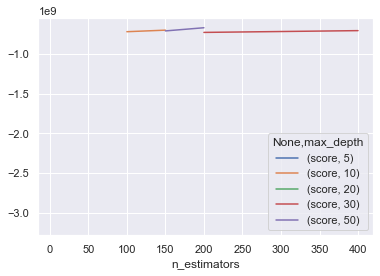

In [885]:
rnd_search_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack().plot()

# AJUSTEMENT DU MODELE

In [892]:
###on utilise random forest car il est le meilleur modèle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
n_estimators = [5,10,20,40,80,100]
max_depth = [5, 10, 20, 30, 50]

param_distribs = {
        'n_estimators': n_estimators,
        'max_features': randint(low=1, high=50),
        'max_depth' : max_depth,
    
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 10, 20, 30, 50],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff194a18f70>,
                                        'n_estimators': [5, 10, 20, 40, 80,
                                                         100]},
                   random_state=42, scoring='neg_mean_squared_error')

In [893]:
rnd_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [894]:
print(rnd_search.best_params_)
print(rnd_search.best_estimator_)


{'max_depth': 30, 'max_features': 40, 'n_estimators': 20}
RandomForestRegressor(max_depth=30, max_features=40, n_estimators=20,
                      random_state=42)


In [895]:
rnd_search_result = pd.DataFrame(rnd_search.cv_results_["params"])
rnd_search_result["score"] = rnd_search.cv_results_["mean_test_score"]

In [896]:
rnd_search_result.describe

<bound method NDFrame.describe of    max_depth  max_features  n_estimators         score
0         30            29            20 -7.120587e+08
1         50            21            10 -8.222351e+08
2         20            23            20 -7.511949e+08
3         20            24            80 -6.978654e+08
4         30            40            20 -6.834728e+08
5         50             2            40 -1.190082e+09
6         10            21             5 -9.980555e+08
7         30            22            80 -7.124129e+08
8         30            25             5 -9.944626e+08
9         20            42            40 -7.101693e+08>

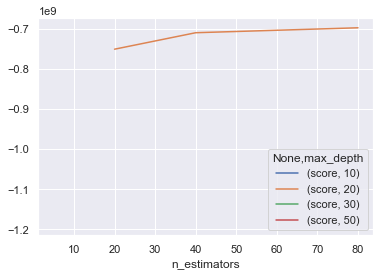

In [897]:
rnd_search_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack().plot()

# Prédiction de Y avec la base test du concours

In [898]:

final_model = rnd_search.best_estimator_
Y_pred = final_model.predict(test)





In [899]:
Y_pred.astype(int)

array([127155, 164895, 194878, ..., 144580, 115542, 234878])

In [900]:
###création base submission
submission = pd.DataFrame({'Id': test_Id["Id"],'SalePrice': Y_pred.astype(np.int32)});
submission.to_csv('submission_House_Price.csv', index=False)
submission


Id  SalePrice
0     1461     127155
1     1462     164895
2     1463     194878
3     1464     188427
4     1465     192244
...    ...        ...
1454  2915      92037
1455  2916      94670
1456  2917     144580
1457  2918     115542
1458  2919     234878

[1459 rows x 2 columns]

In [917]:

###importation base sample

sample = pd.read_csv("/Users/tavaresmaura//Desktop/SVM et ANN python /house-prices-advanced-regression-techniques/sample_submission.csv", sep=',')

In [902]:
mod_r2 = r2_score(sample_1['SalePrice'], Y_pred)
mod_mse = mean_squared_error(sample_1['SalePrice'], Y_pred)
mod_rmse = np.sqrt(svm_mse)
mod_mae = mean_absolute_error(sample_1['SalePrice'],Y_pred)

print('{:25s}{:5.3f}'.format('R2:', svm_r2))
print('{:25s}{:5.3f}'.format('Root Mean Squared Error:', mod_rmse))
print('{:25s}{:5.3f}'.format('Mean Absolute Error:', mod_mae))



R2:                      0.810
Root Mean Squared Error: 35793.113
Mean Absolute Error:     53193.046
